<div style="border: 1px solid black; padding: 10px;">
<table>
<tr>
    <td width=20%>
        <br/> <a style="font-size: 16px; font-weight: italic"> Data Scientist Junior </a> <br/> <br/> Théo JEAN <br/>
    </td>
    <td width=60%>
        <center>
            <h1>Analyse de l'attrition bancaire</h1>
            <h2> <font color='red'> What type of customer is likely to change bank?</font> </h2>
        </center>
    </td>
    <td width=20%>
        <a style="font-size: 16px; font-weight: bold"> Personal project 1 </a>
         <br/> 07/04/2024 <br/>
    </td>
</tr>
</table>
</div>

https://www.kaggle.com/datasets/manjuahuja/bank-churner

# First overview of the dataset :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimpy import skim
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("BankChurners.csv", sep=",")

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df = df.iloc[:, 1:-2] # deletion of last two columns not required for analysis and the first

In [5]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

### **DESCRIPTION DES VARIABLES :**

**CLIENTNUM** : Quantitative, identifiant du client 

**Attribution_Flag** : Qualitative, toujours client ou pas

**Customer_Age** : Quantitative, age du client

**Gender** : Qualitative, sexe du client

**Dependent_count** : Quantitative, nombre de compte du client

**Education_level** : Qualitative, niveau d'éducation du client

**Marital_Status** : Qualitative, situation amoureuse du client

**Income_category** : Qualitative, tranche de revenue du client

**Card_Category** : Qualitative, type de carte de crédit du client

**Months_on_book** : Quantitative, période en mois où le client est avec cette banque

**Total_Relationship_Count** : Quantitative, nombre total de produits détenus par le client

**Months_Inactive_12_mon** : Quantitative, Nombre de mois inactifs au cours des 12 derniers mois

**Contacts_Count_12_mon** : Quantitative, Nombre de contacts avec la banque au cours des 12 derniers mois

**Credit_Limit** : Quantitative, plafond bancaire du client

**Total_Revolving_Bal** : Quantitative, Total du crédit renouvelable actuel

**Avg_Open_To_Buy**: Quantitative, Moyenne sur les 12 derniers mois du montant qu'il restait à dépenser en fin de mois

**Total_Amt_Chng_Q4_Q1** : Quantitative, Variation du montant des transactions (T4 par rapport au T1)

**Total_Trans_Amt** : Quantitative, Montant total des transactions (12 derniers mois)

**Total_Trans_Ct** : Quantitative, Nombre total de transactions (12 derniers mois)

**Total_Ct_Chng_Q4_Q1** : Quantitative, Variation du nombre d’opérations (T4 par rapport au T1)

**Avg_Utilization_Ratio** : Quantitative, Taux moyen d'utilisation des cartes

In [6]:
convert_col = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status','Income_Category', 'Card_Category' ]

for col in convert_col:
    df[col] = df[col].astype('category')

In [7]:
skim(df)
print('This dataframe contains', len(df), 'obs and', len(df.columns), 'columns')

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 10127  │ │ int64       │ 9     │ │ Attrition_Flag        │                                │
│ │ Number of columns │ 20     │ │ category    │ 6     │ │ Gender                │                                │
│ └───────────────────┴────────┘ │ float64     │ 5     │ │ Education_Level       │                                │
│                                └─────────────┴───────┘ │ Marital_Status        │                                │
│                                                        │ Income_Category       │                                │
│                                                        │ Card_Category         │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %  ┃ mean  ┃ sd    ┃ p0    ┃ p25    ┃ p50   ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Customer_Age             │   0 │     0 │    46 │     8 │    26 │     41 │    46 │     52 │     73 │ ▁▅▇▆▂  │  │
│ │ Dependent_count          │   0 │     0 │   2.3 │   1.3 │     0 │      1 │     2 │      3 │      5 │ ▃▅▇▇▅▁ │  │
│ │ Months_on_book           │   0 │     0 │    36 │     8 │    13 │     31 │    36 │     40 │     56 │ ▁▂▃▇▃▁ │  │
│ │ Total_Relationship_Count │   0 │     0 │   3.8 │   1.6 │     1 │      3 │     4 │      5 │      6 │ ▃▅▇▇▇▆ │  │
│ │ Months_Inactive_12_mon   │   0 │     0 │   2.3 │     1 │     0 │      2 │     2 │      3 │      6 │  ▅▇▇▁▁ │  │
│ │ Contacts_Count_12_mon    │   0 │     0 │   2.5 │   1.1 │     0 │      2 │     2 │      3 │      6 │ ▁▃▇▇▃▁ │  │
│ │ Credit_Limit             │   0 │     0 │  8600 │  9100 │  1400 │   2600 │  4500 │  11000 │  35000 │ ▇▂▁▁ ▁ │  │
│ │ Total_Revolving_Bal      │   0 │     0 │  1200 │   810 │     0 │    360 │  1300 │   1800 │   2500 │ ▇▂▅▇▅▅ │  │
│ │ Avg_Open_To_Buy          │   0 │     0 │  7500 │  9100 │     3 │   1300 │  3500 │   9900 │  35000 │ ▇▂▁▁ ▁ │  │
│ │ Total_Amt_Chng_Q4_Q1     │   0 │     0 │  0.76 │  0.22 │     0 │   0.63 │  0.74 │   0.86 │    3.4 │   ▁▇   │  │
│ │ Total_Trans_Amt          │   0 │     0 │  4400 │  3400 │   510 │   2200 │  3900 │   4700 │  18000 │ ▇▇▁ ▁  │  │
│ │ Total_Trans_Ct           │   0 │     0 │    65 │    23 │    10 │     45 │    67 │     81 │    140 │ ▂▆▇▇▂▁ │  │
│ │ Total_Ct_Chng_Q4_Q1      │   0 │     0 │  0.71 │  0.24 │     0 │   0.58 │   0.7 │   0.82 │    3.7 │   ▃▇   │  │
│ │ Avg_Utilization_Ratio    │   0 │     0 │  0.27 │  0.28 │     0 │  0.023 │  0.18 │    0.5 │      1 │ ▇▂▂▂▂▁ │  │
│ └──────────────────────────┴─────┴───────┴───────┴───────┴───────┴────────┴───────┴────────┴────────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                             ┃ NA       ┃ NA %         ┃ ordered             ┃ unique           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇

This dataframe contains 10127 obs and 20 columns


Target value : **Attrition_Flag**

**RESUME STATISTIQUES DESCRIPTIVES / PROFIL DES CLIENTS DE LA BANQUE :**

Profil démographique : 
- La majorité des clients ont un âge compris entre 41 et 52 ans, avec une médiane de 46 ans.
- La plupart des clients ont entre 1 et 3 personnes à charge, avec une médiane de 2.3.
- En moyenne, les clients sont clients depuis 36 mois, avec la plupart des clients ayant entre 31 et 40 mois d'ancienneté.

Engagement et relation avec la banque :

- Les clients détiennent en moyenne 3.8 produits bancaires.
- En moyenne, les clients ont été inactifs pendant 2.3 mois au cours des 12 derniers mois.
- Les clients ont eu en moyenne 2.5 contacts avec la banque au cours des 12 derniers mois.

Santé financière :

- La limite de crédit à la consommation en moyenne des clients se situe autour de 8600, avec une variation significative.
- La plupart des clients ont un solde renouvelable entre 360 et 1800.
- En moyenne, les clients ont un montant ouvert à l'achat entre 1300 et 9900.

Comportement financier :

- Le changement total du montant au cours du quatrième trimestre par rapport au premier trimestre est en moyenne de 0.76.
- La plupart des clients ont un montant total de transaction entre 2200 et 4700.
- En moyenne, les clients ont entre 45 et 81 transactions.

In [8]:
df.duplicated().any() # any duplicated obs verification 

False

In [9]:
# Let's check for missing hidden values in categorical variables

for col in df.select_dtypes(include='category').columns:
    print(f'{col} : {df[col].unique()}')

Attrition_Flag : ['Existing Customer', 'Attrited Customer']
Categories (2, object): ['Attrited Customer', 'Existing Customer']
Gender : ['M', 'F']
Categories (2, object): ['F', 'M']
Education_Level : ['High School', 'Graduate', 'Uneducated', 'Unknown', 'College', 'Post-Graduate', 'Doctorate']
Categories (7, object): ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown']
Marital_Status : ['Married', 'Single', 'Unknown', 'Divorced']
Categories (4, object): ['Divorced', 'Married', 'Single', 'Unknown']
Income_Category : ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'Unknown']
Categories (6, object): ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown']
Card_Category : ['Blue', 'Gold', 'Silver', 'Platinum']
Categories (4, object): ['Blue', 'Gold', 'Platinum', 'Silver']


We can see that in `Education_Level`, `Marital_Status` and `Income_Category` there are Unknown values

In [10]:
unknown_col = ['Education_Level', 'Marital_Status', 'Income_Category']

for col in unknown_col:
    print(f"{col} : {len(df[df[col] == 'Unknown'])}")
    print(round((df[col] == 'Unknown').mean() * 100, 2),'%')
    print('-----')

Education_Level : 1519
15.0 %
-----
Marital_Status : 749
7.4 %
-----
Income_Category : 1112
10.98 %
-----


# 1. Exploratory Data Analysis (EDA)

## 1.1. Variables qualitatives:

In [11]:
string_columns = df.select_dtypes(include=['category'])

for i in string_columns.columns:
    print(f"Décompte des valeurs pour la colonne '{i}':")
    print(string_columns[i].value_counts().to_string(), end="\n\n")

Décompte des valeurs pour la colonne 'Attrition_Flag':
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627

Décompte des valeurs pour la colonne 'Gender':
Gender
F    5358
M    4769

Décompte des valeurs pour la colonne 'Education_Level':
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451

Décompte des valeurs pour la colonne 'Marital_Status':
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748

Décompte des valeurs pour la colonne 'Income_Category':
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727

Décompte des valeurs pour la colonne 'Card_Category':
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20



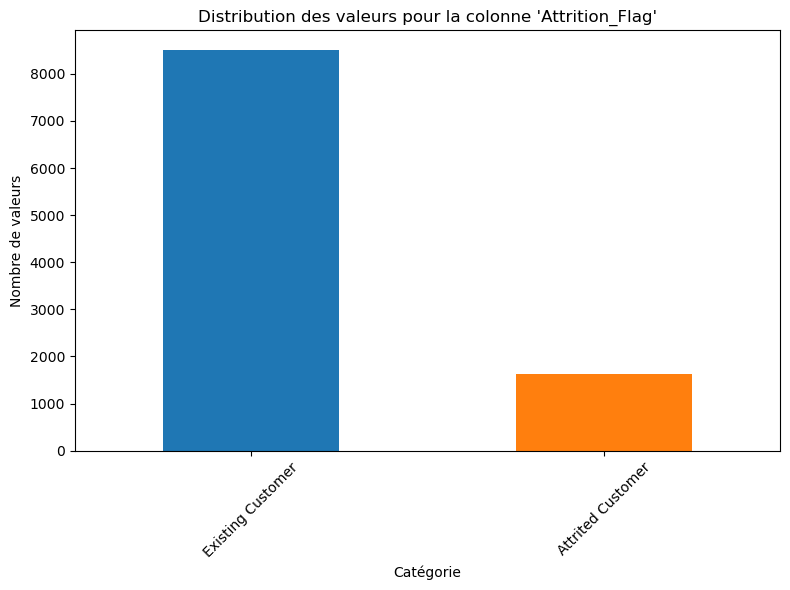

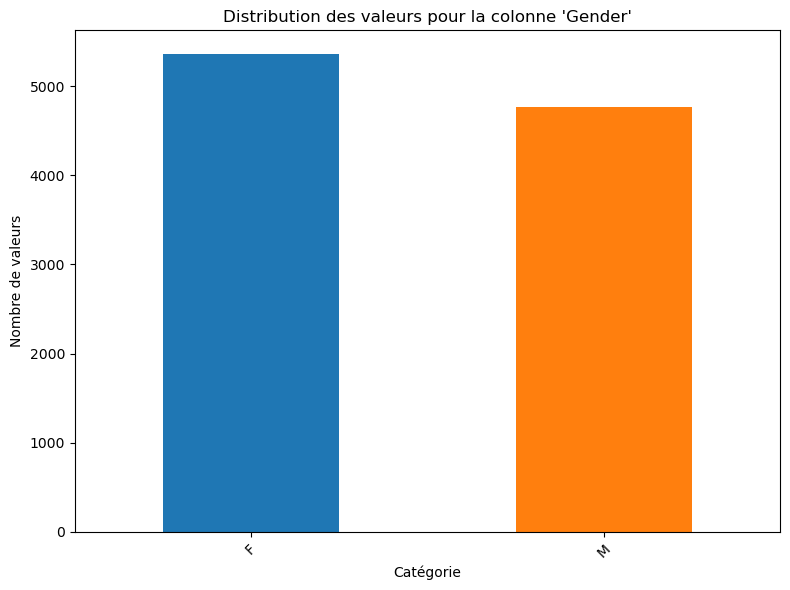

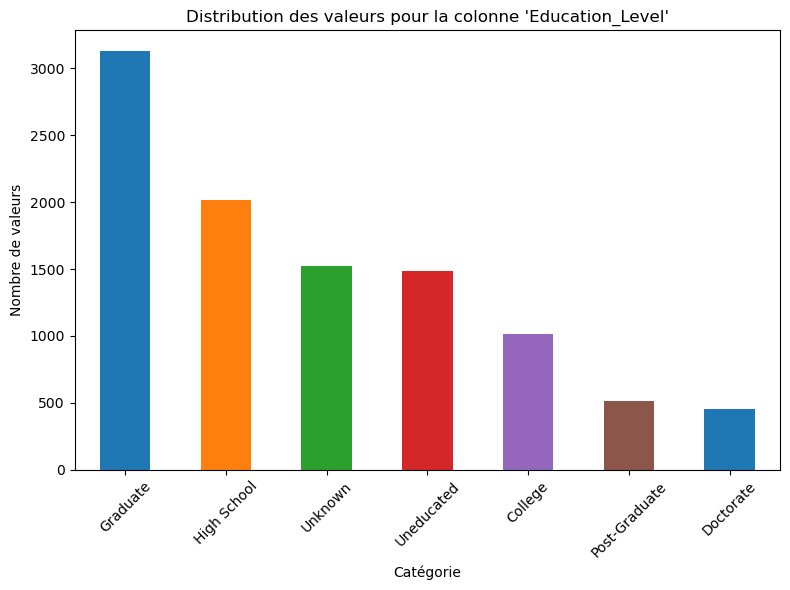

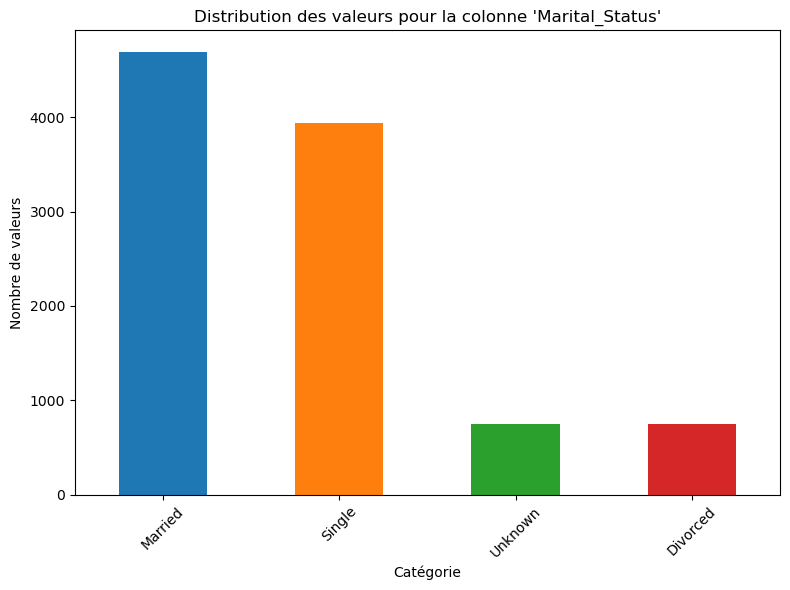

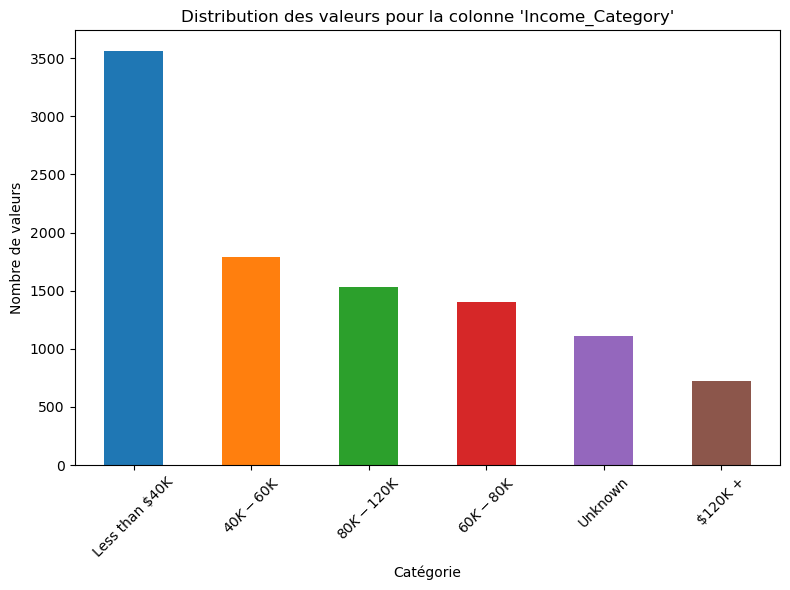

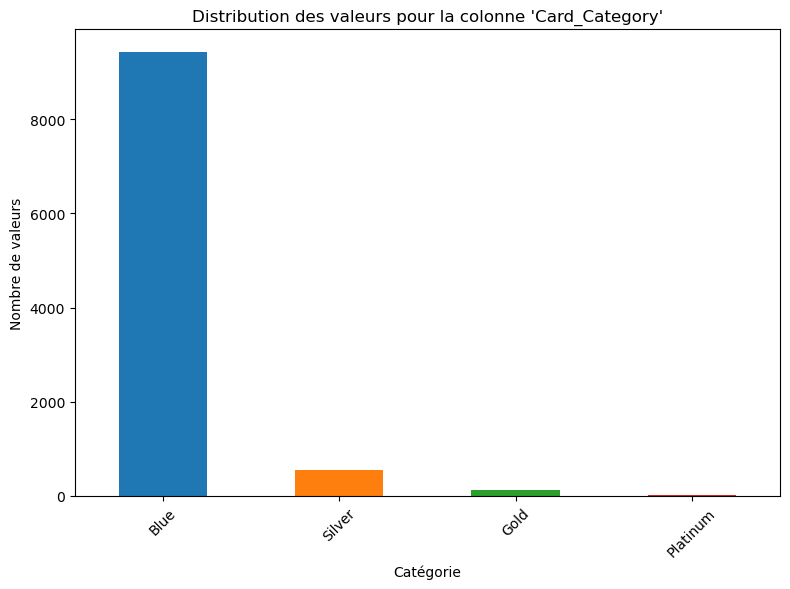

In [12]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Itération sur les colonnes de type string et affichage des graphiques
for col in string_columns.columns:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar', color=custom_colors)
    plt.title(f"Distribution des valeurs pour la colonne '{col}'")
    plt.xlabel('Catégorie')
    plt.ylabel('Nombre de valeurs')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 1.2. Variables quantitatives :

In [13]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

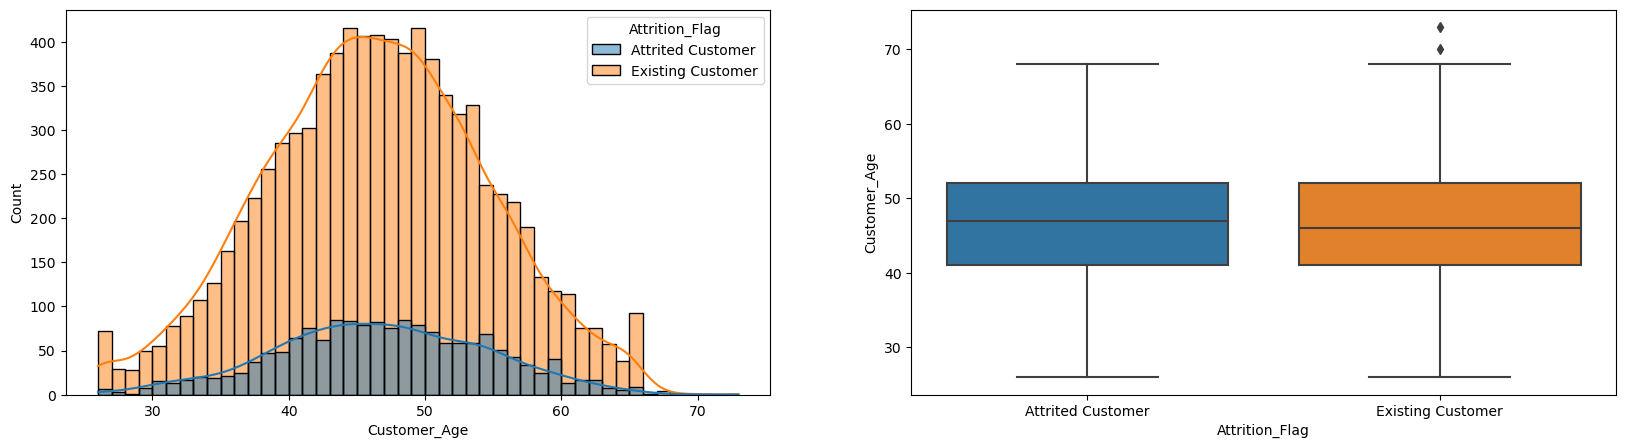

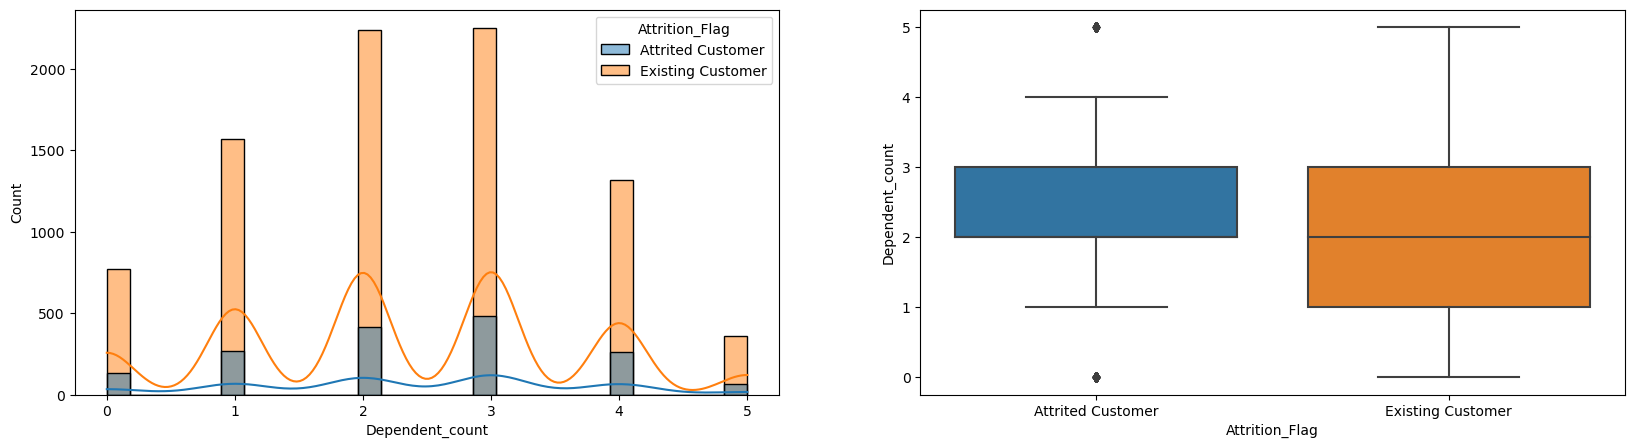

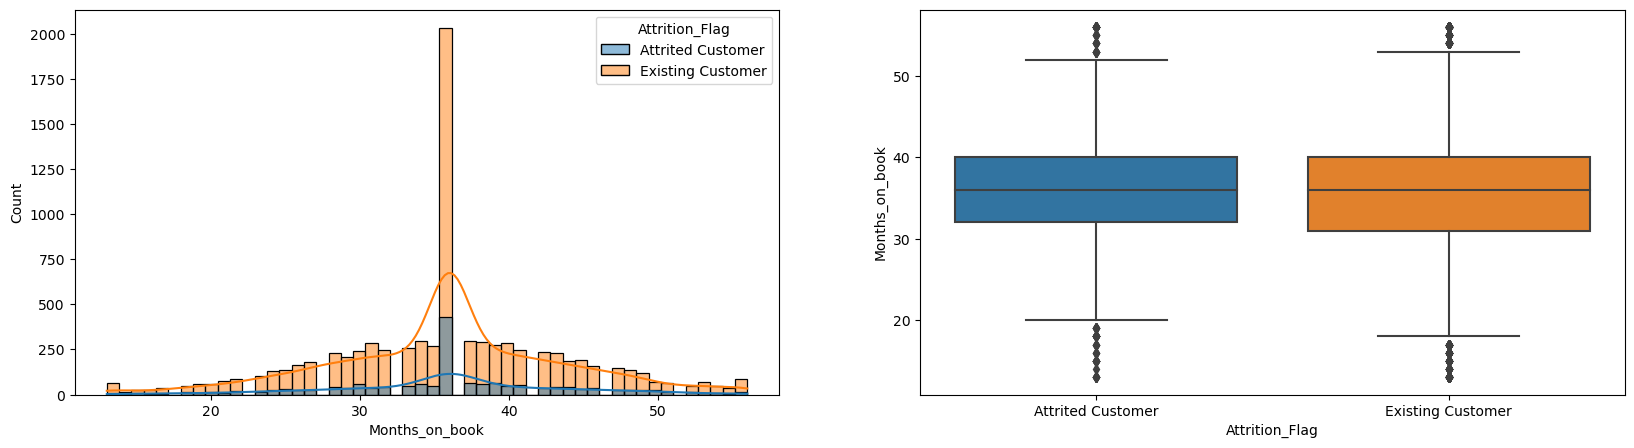

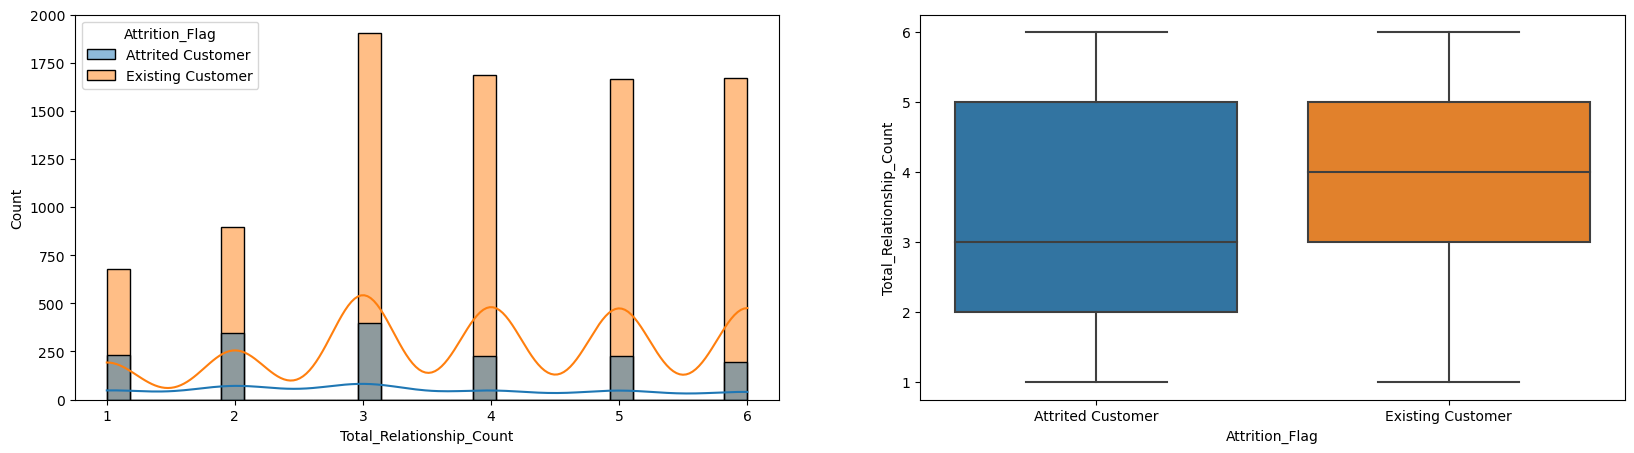

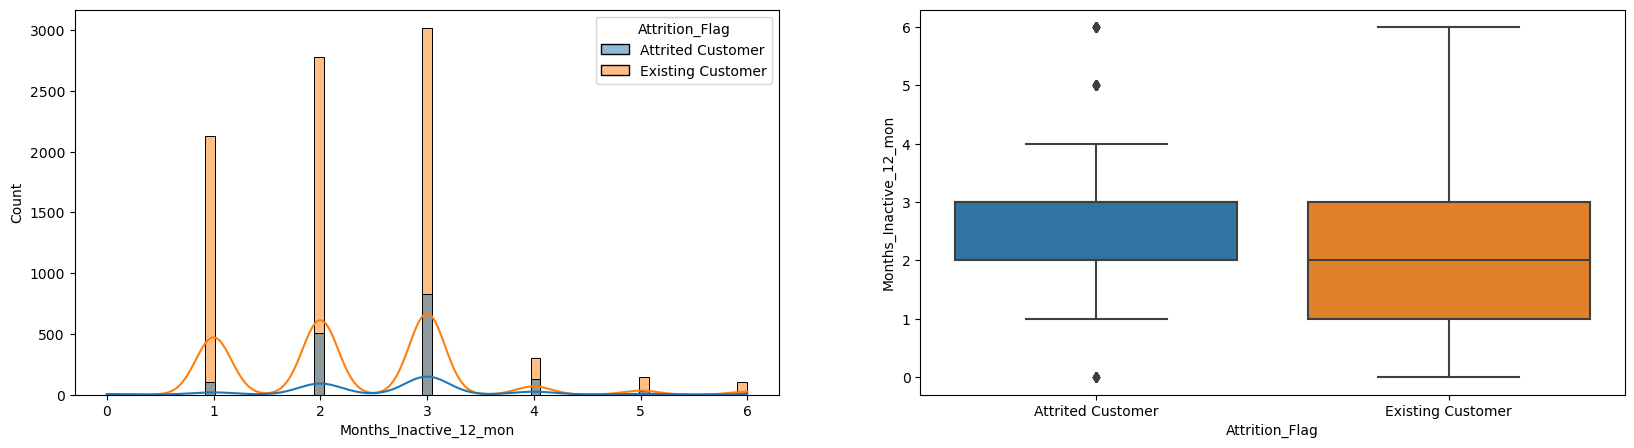

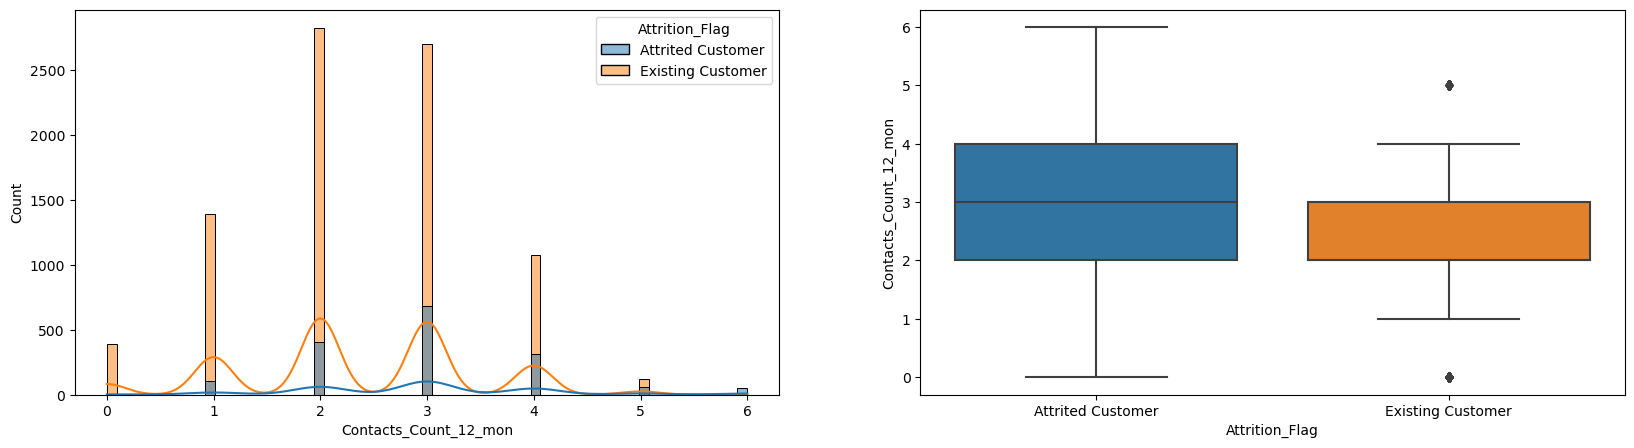

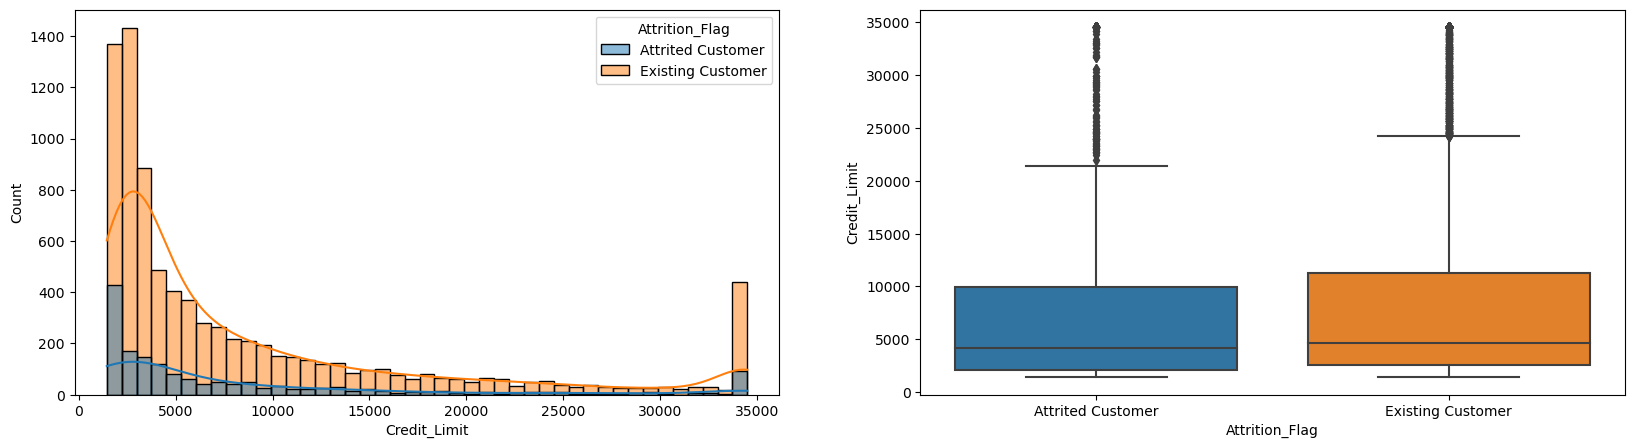

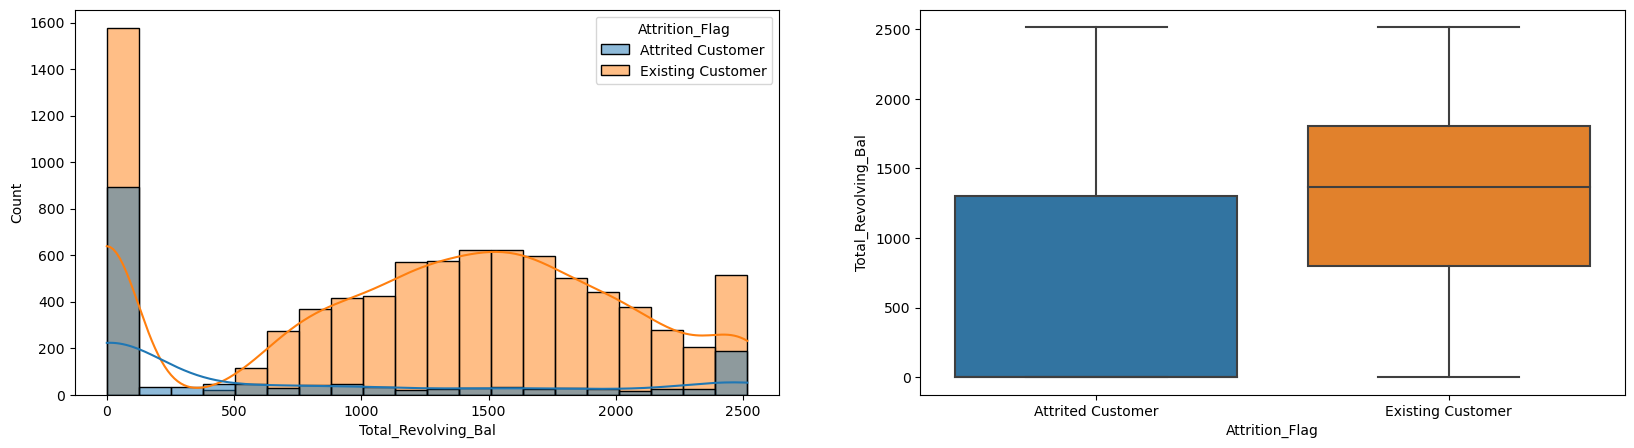

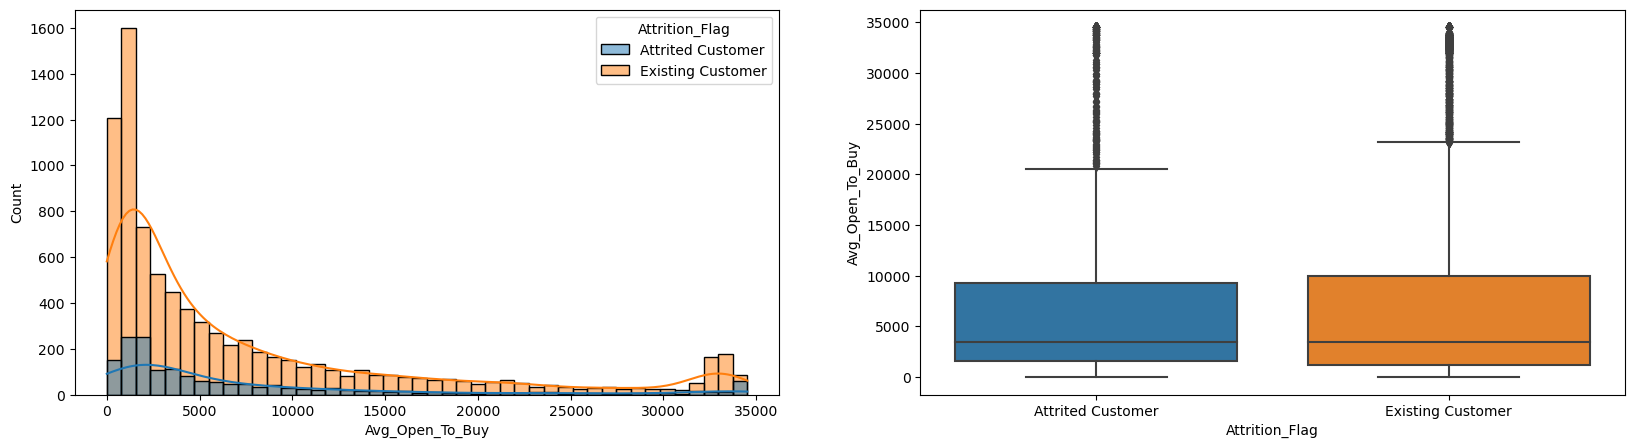

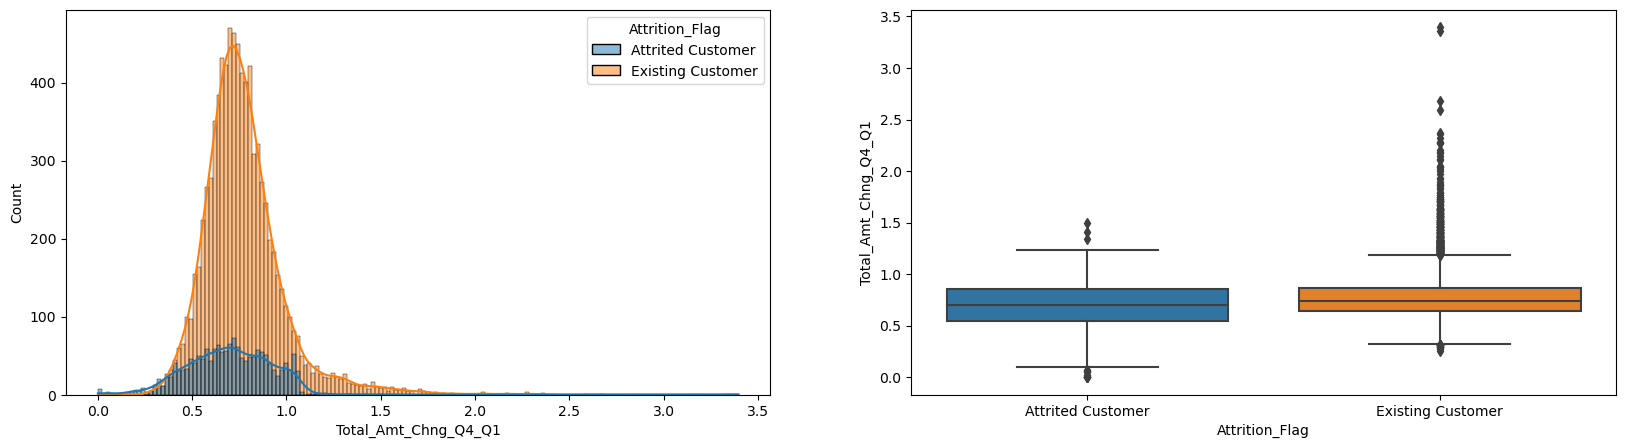

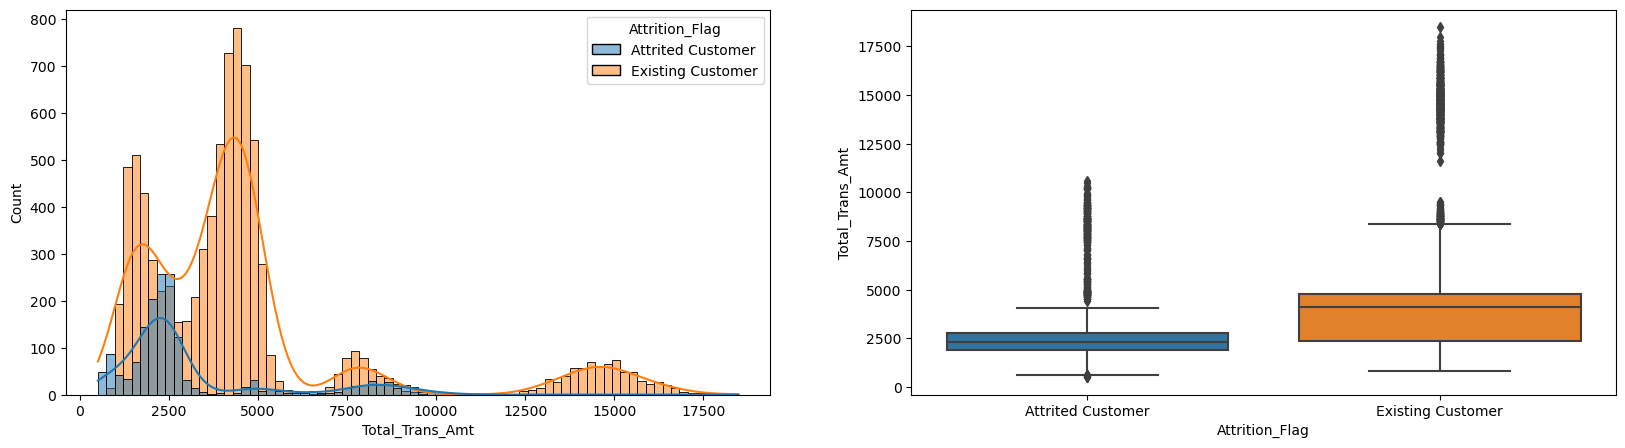

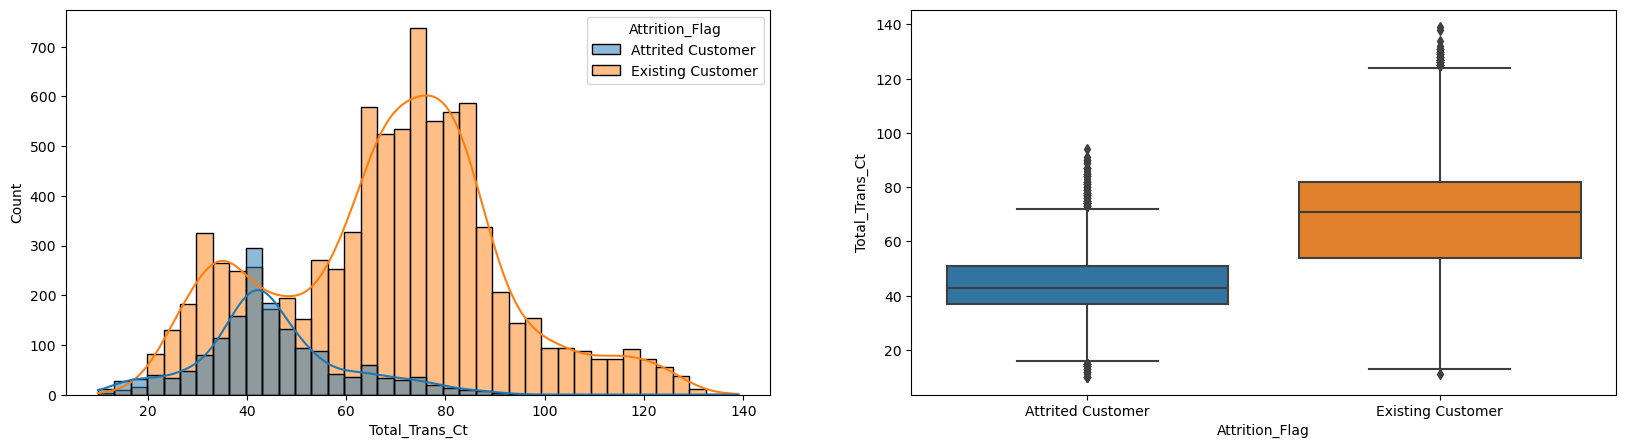

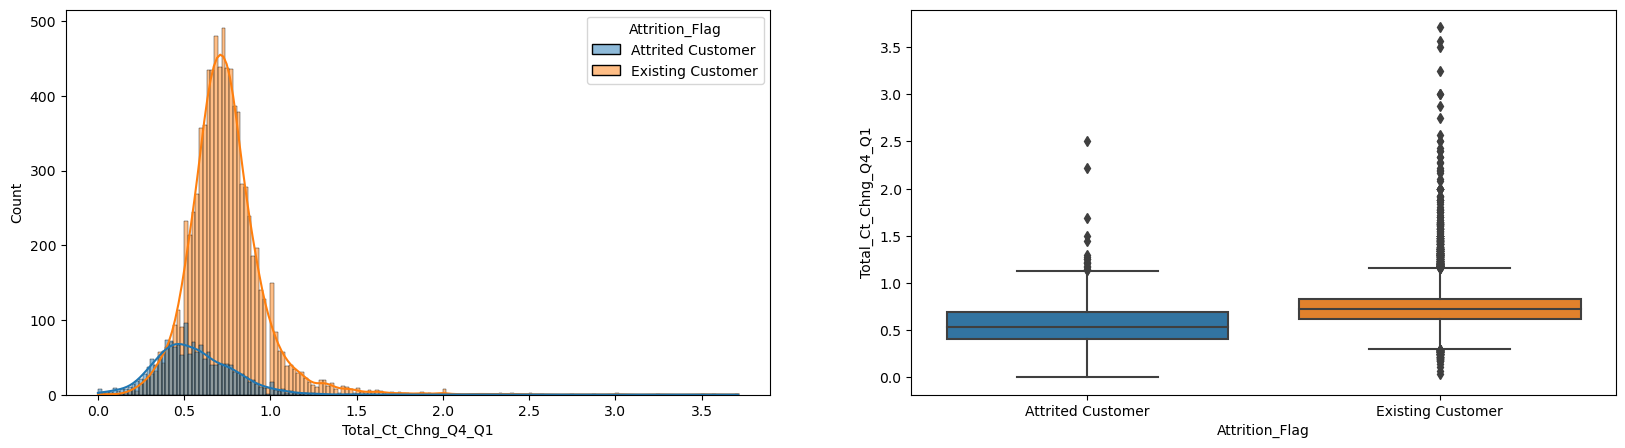

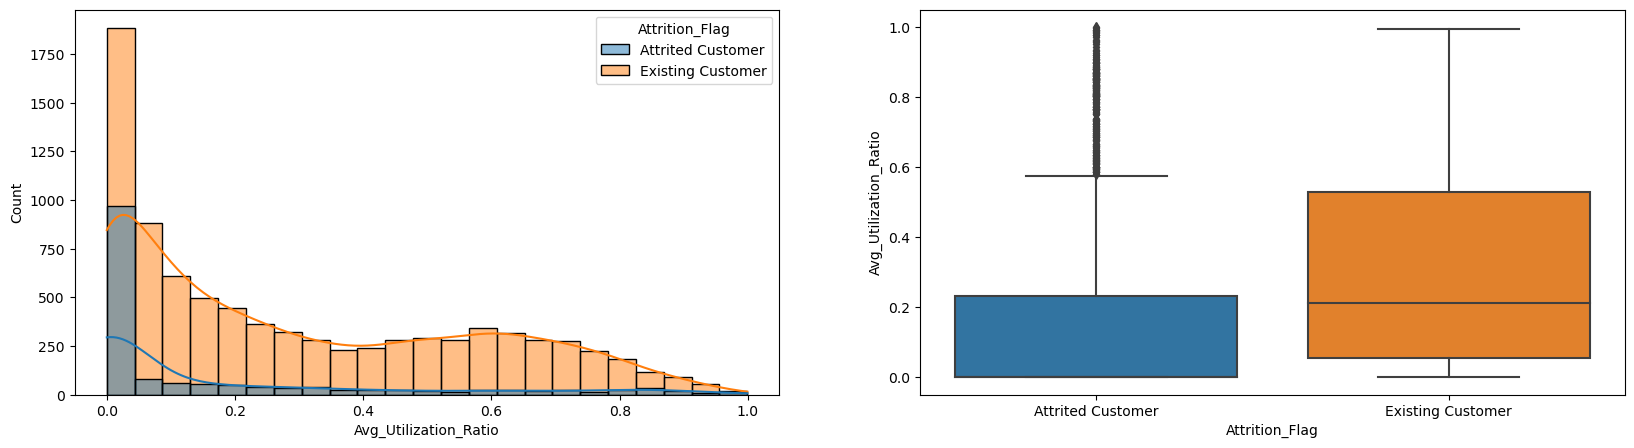

In [14]:
def plot_box(var):
    plt.subplot(1, 2, 1)  # Met le graphique à gauche de l'écran
    sns.histplot(data=df, x=var, hue='Attrition_Flag', kde=True)  # kde=True permet de mettre la densité
    
    plt.subplot(1, 2, 2)  # Met le graphique à droite de l'écran
    sns.boxplot(x='Attrition_Flag', y=var, data=df)
    
    plt.show()

for col in numeric_columns.columns:
    plt.figure(figsize=(20, 5))
    plot_box(col)

**Total_Revolving_Bal, Total_Trans_Ct et Avg_Utilization_Ratio semble être des variables intéressantes dans l'analyse de l'attrition**

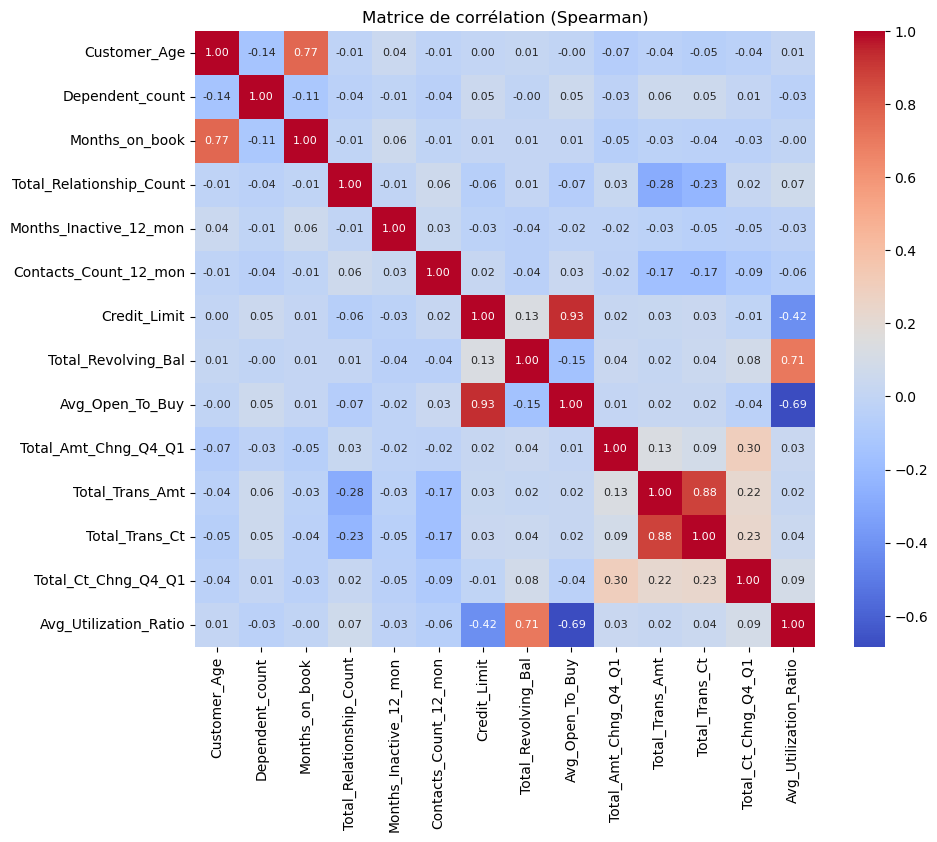

In [15]:
corr_matrix = numeric_columns.corr(method='spearman') # Pourquoi utiliser Spearman ?

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Matrice de corrélation (Spearman)')
plt.show()

Grâce à cette représentation graphique on voit que certaines variables semblent corrélées entre elles :
* ***Month_on_book*** et ***Customer_Age*** => 0.77
* ***Total_Trans_Ct*** et ***Total_Trans_Amt*** => 0.88
* ***Total_Revolving_Bal*** et ***Avg_utilzation_Ratio*** => 0.71
* ***Avg_Open_To_Buy*** et ***Credit_Limit*** => 0.93

Les boxplot entre Avg_Open_To_Buy et Credit_Limit ne varient pas en fonction de l'attrition ou non, donc on peut supprimer une des deux. On supprime Total_Trans_Ct car la variable Avg_Utilization_Ration correspond déjà à un critère de nombre de transaction

In [16]:
df.drop(columns=['Total_Trans_Ct', 'Avg_Open_To_Buy', 'Total_Revolving_Bal'], inplace=True)

In [17]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

In [18]:
df.select_dtypes(include=['int64', 'float64'])

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,1.335,1144,1.625,0.061
1,49,5,44,6,1,2,8256.0,1.541,1291,3.714,0.105
2,51,3,36,4,1,0,3418.0,2.594,1887,2.333,0.000
3,40,4,34,3,4,1,3313.0,1.405,1171,2.333,0.760
4,40,3,21,5,1,0,4716.0,2.175,816,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,0.703,15476,0.857,0.462
10123,41,2,25,4,2,3,4277.0,0.804,8764,0.683,0.511
10124,44,1,36,5,3,4,5409.0,0.819,10291,0.818,0.000
10125,30,2,36,4,3,3,5281.0,0.535,8395,0.722,0.000


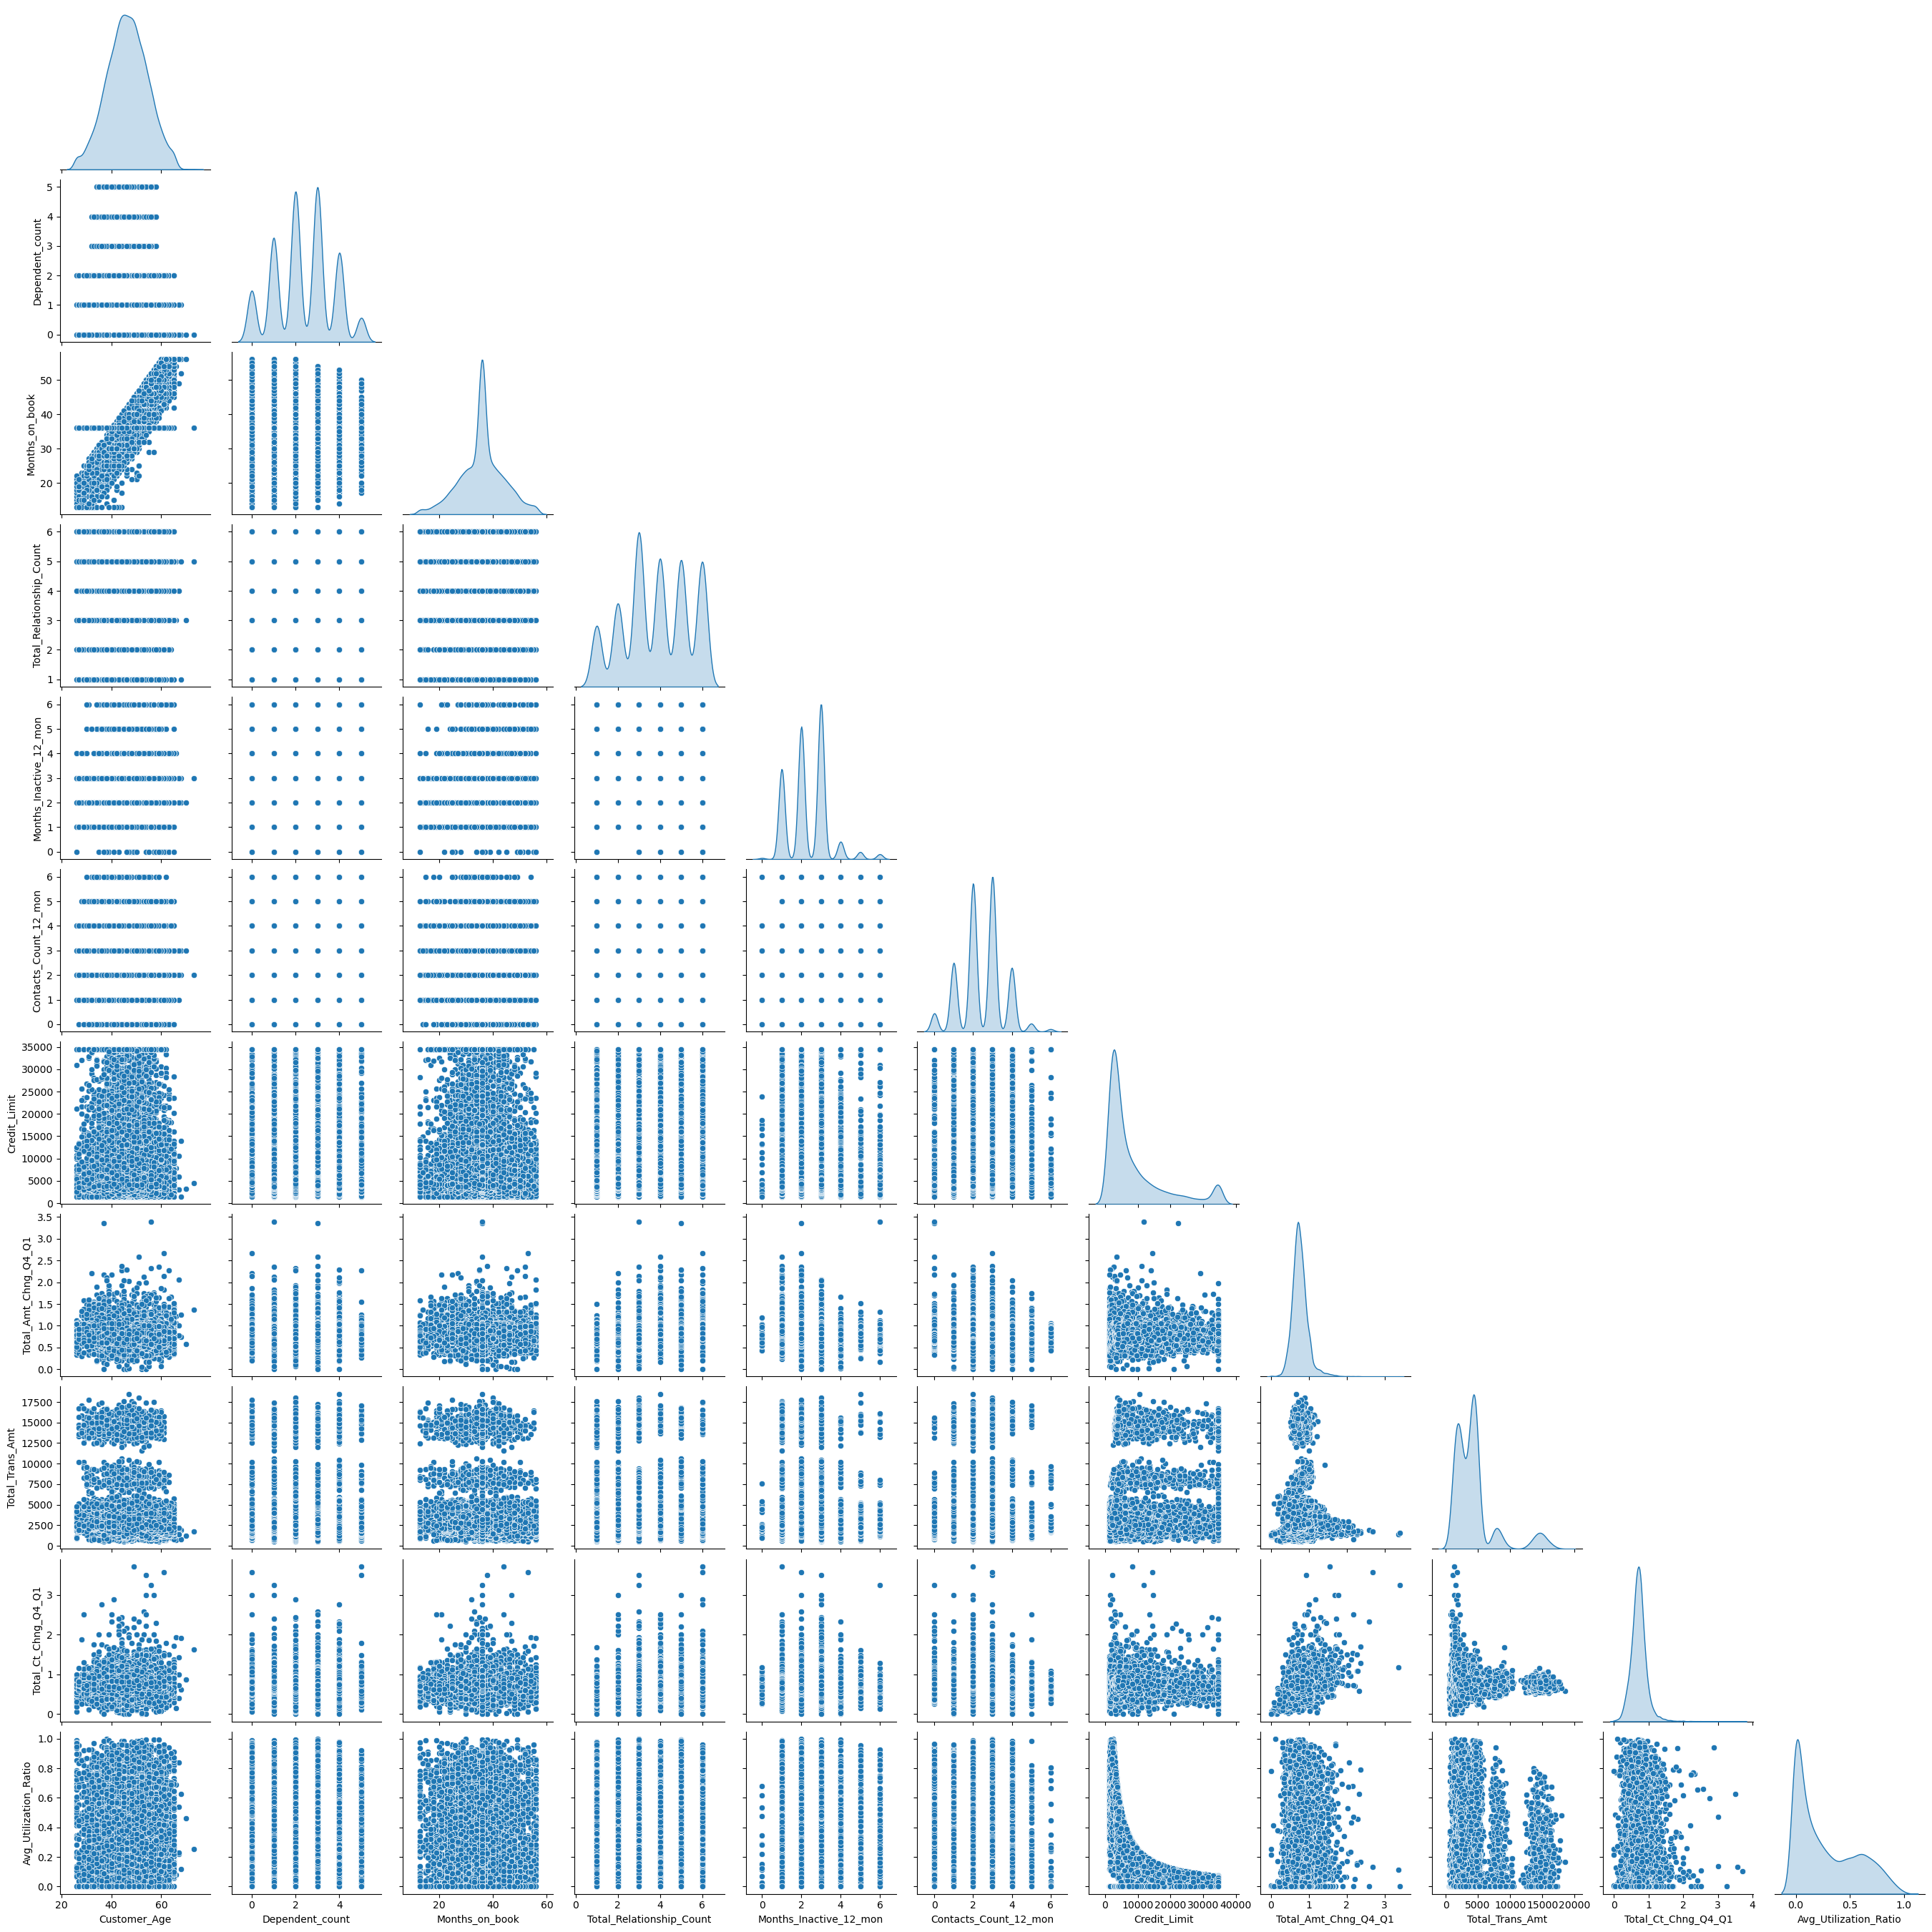

In [19]:
sns.pairplot(numeric_columns, corner=True, diag_kind="kde")

On observe une relation linéaire entre `Month_On_Book` et `Customer_Age`. On verra plus tard si on supprimer une des deux variables

# 3. Preprocessing before modeling

IterativeImputer pour le traitement des valeurs manquantes ?
Garder seulement AVG utilisation ratio ?
Outiliers ?

https://www.kaggle.com/code/rebeccapringle/bank-churners-96-6-accuracy

In [103]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [85]:
X = df.drop(columns=['Attrition_Flag'])  
y = df['Attrition_Flag']  

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8101, 16), (2026, 16), (8101,), (2026,))

## 3.1. Pipeline creation

In [88]:
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,1.335,1144,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,1.541,1291,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,2.594,1887,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,1.405,1171,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,2.175,816,2.500,0.000


In [89]:
numeric_features = X.select_dtypes(include=['int', 'float']).columns
categorical_features = X.select_dtypes(include=['category']).columns

In [90]:
numeric_transformer = make_pipeline(
    RobustScaler()
)

In [91]:
categorical_transformer = make_pipeline(
    OneHotEncoder(handle_unknown='ignore')
)

In [104]:
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features)
)

In [105]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [106]:
pipeline = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=42)
)

In [107]:
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}

In [108]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

In [111]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('robustscaler',
                                                                                          RobustScaler())]),
                                                                         Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt',...
                                                                         Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object'))])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__max_depth': [None, 10, 20],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [50, 100,
                                                                  200]},
             scoring='accuracy')

In [113]:
print("Meilleur score:", grid_search.best_score_)
print("Meilleurs paramètres:", grid_search.best_params_)

Meilleur score: 0.9401321391306997
Meilleurs paramètres: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 100}


In [114]:
# Prédiction sur les données de test avec le meilleur modèle
y_pred = grid_search.best_estimator_.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9284304047384008


In [115]:
from sklearn.ensemble import GradientBoostingClassifier

In [1]:
pipeline = make_pipeline(
    preprocessor,
    GradientBoostingClassifier(random_state=42)
)

# Définition de la grille de recherche
param_grid = {
    'gradientboostingclassifier__n_estimators': [50, 100, 200],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [3, 5, 7]
}

# Recherche sur grille avec validation croisée
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Entraînement du modèle avec recherche sur grille
grid_search.fit(X_train, y_train)

# Meilleur score et paramètres
print("Meilleur score:", grid_search.best_score_)
print("Meilleurs paramètres:", grid_search.best_params_)

# Prédiction sur les données de test avec le meilleur modèle
y_pred = grid_search.best_estimator_.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

NameError: name 'make_pipeline' is not defined

In [119]:
import joblib

# Enregistrer le modèle dans un fichier
joblib.dump(grid_search, 'GradientBoosting_095.pkl')

# Charger le modèle à partir du fichier
#loaded_model = joblib.load('modele_rf.pkl')

# Utiliser le modèle chargé pour prédire sur de nouvelles données
#y_pred = loaded_model.predict(X_test)

['GradientBoosting_095.pkl']

## 3.3. Data transformation

**Transformation logarithmique :**

In [20]:
df_ml = df.copy()

In [21]:
numeric_columns = df_ml.select_dtypes(include=np.number)

# Appliquer une transformation logarithmique en toute sécurité
def safe_log(x):
    return np.log(x + 1e-10)  # Ajoute une petite valeur pour éviter les zéros

# Appliquer la transformation logarithmique en toute sécurité à une colonne spécifique
df_ml[numeric_columns.columns] = safe_log(df_ml[numeric_columns.columns])

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
df_ml.dtypes

Attrition_Flag              category
Customer_Age                 float64
Gender                      category
Dependent_count              float64
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category               category
Months_on_book               float64
Total_Relationship_Count     float64
Months_Inactive_12_mon       float64
Contacts_Count_12_mon        float64
Credit_Limit                 float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt              float64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
dtype: object

In [24]:
df_ml['Gender'] = df_ml['Gender'].map({'M': 1, 'F': 0})
df_ml['Attrition_Flag'] = df_ml['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

catcols = df_ml.select_dtypes(exclude = ['int64','float64']).columns
intcols = df_ml.select_dtypes(include = ['int64']).columns
floatcols = df_ml.select_dtypes(include = ['float64']).columns

# one-hot encoding on categorical columns
df_ml = pd.get_dummies(df_ml, columns = catcols)

# minmax scaling numeric features 
for col in df_ml[floatcols]:
    df_ml[col] = MinMaxScaler().fit_transform(df_ml[[col]])
    
for col in df_ml[intcols]:
    df_ml[col] = MinMaxScaler().fit_transform(df_ml[[col]])
    
print('New Number of Features: %d'%(df_ml.shape[1]))  

New Number of Features: 36


**One-Hot Encoding pour les variables catégorielles classiques** : 

In [25]:
df_ml.Attrition_Flag = df_ml.Attrition_Flag.map({'Existing Customer':0, 'Attrited Customer':1})

AttributeError: 'DataFrame' object has no attribute 'Attrition_Flag'

In [ ]:
# Sélectionner les variables catégorielles à encoder en one-hot
selected_features = ['Gender', 'Marital_Status','Education_Level', 'Income_Category', 'Card_Category']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Créer une instance de OneHotEncoder
OHE = OneHotEncoder(sparse=False)

In [ ]:
# Appliquer le codage one-hot aux variables sélectionnées
encoded_features = OHE.fit_transform(df_ml[selected_features])

In [ ]:
# Créer un DataFrame avec les variables encodées en one-hot
encoded_df = pd.DataFrame(encoded_features, columns=OHE.get_feature_names_out(selected_features))

In [ ]:
encoded_df.head()

In [ ]:
# Supprimer les colonnes originales des variables sélectionnées
df_ml.drop(columns=selected_features, inplace=True)

In [ ]:
# Concaténer les variables encodées en one-hot avec le DataFrame d'origine
df_ml = pd.concat([df_ml, encoded_df], axis=1)

In [ ]:
df_ml.head()

# 4. Train-Test Split :

Pour garantir une bon mélange des classes :

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
X = df_ml.drop('Attrition_Flag', axis=1)  
y = df_ml['Attrition_Flag']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X_train

# 5. ML

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Définir les modèles à tester
models = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Boosted Trees': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier()
}

# Boucle sur chaque modèle
for name, model in models.items():
    # Entraîner le modèle sur les données d'entraînement
    model.fit(X_train, y_train)
    
    # Faire des prédictions sur les données de test
    y_pred = model.predict(X_test)
    
    # Calculer la précision du modèle
    accuracy = accuracy_score(y_test, y_pred)
    
    # Afficher la précision
    print(f"{name}: Accuracy = {accuracy:.2f}")


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Ajouter les nouveaux modèles à tester
models.update({
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier()
})

# Boucle sur chaque modèle
for name, model in models.items():
    # Entraîner le modèle sur les données d'entraînement
    model.fit(X_train, y_train)
    
    # Faire des prédictions sur les données de test
    y_pred = model.predict(X_test)
    
    # Calculer la précision du modèle
    accuracy = accuracy_score(y_test, y_pred)
    
    # Afficher la précision
    print(f"{name}: Accuracy = {accuracy:.2f}")


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# Supposons que vous avez déjà prétraité vos données et que vous avez x_train et y_train

# Création de l'architecture du modèle
class CustomModel(Model):
    def __init__(self):
        super(CustomModel, self).__init__()
        # Définir les couches du modèle
        self.dense1 = layers.Dense(64, activation='relu')
        self.dense2 = layers.Dense(32, activation='relu')
        self.output_layer = layers.Dense(1, activation='sigmoid')  # Pour une classification binaire

    def call(self, inputs):
        # Définir le flux de données à travers le modèle
        x = self.dense1(inputs)
        x = self.dense2(x)
        outputs = self.output_layer(x)
        return outputs

# Création d'une instance de modèle
model = CustomModel()

# Compiler le modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Pour une classification binaire
              metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Évaluation du modèle
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à rechercher
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}

# Créer un modèle RandomForestClassifier
rf_model = RandomForestClassifier()

# Créer une instance de GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Effectuer la recherche par grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et la précision associée
print("Meilleurs paramètres :", grid_search.best_params_)
print("Précision :", grid_search.best_score_)


In [ ]:
from sklearn.metrics import accuracy_score

# Obtenir les prédictions sur l'ensemble de test
y_pred = grid_search.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision sur l'ensemble de test :", accuracy)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Créer un modèle MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=500, random_state=42)

# Entraîner le modèle sur les données d'entraînement
mlp_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = mlp_model.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision sur l'ensemble de test :", accuracy)


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Évaluation du modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy sur l'ensemble de test :", accuracy)


Tracer le courbe d'overfitting, EarlyStopping...

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à rechercher
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Créer un modèle RandomForestClassifier
rf_model = RandomForestClassifier()

# Créer une instance de GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Effectuer la recherche par grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et la précision associée
print("Meilleurs paramètres :", grid_search.best_params_)
print("Précision :", grid_search.best_score_)
